In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

SQLAlchemy is one of the primary technologies we will be looking at in this module. It’s extremely helpful for querying databases. If you are familiar with PostgreSQL, you’ll see there are many similarities to the process. Watch the following video to learn more about SQLAlchemy. 

Let’s get started by looking at the SQLAlchemy Object Relational Mapper (ORM).

### SQLAlchemy ORM
One of the primary features of SQLAlchemy is the Object Relational Mapper, which is commonly referred to as ORM. ORM allows you to create classes in your code that can be mapped to specific tables in a given database. This allows us to create a special type of system called a decoupled system.

To understand ORMs and decoupled systems, consider the following scenario. Suppose you are cleaning out the garage, and you find a bunch of wires or ropes that are all knotted together. We would call this a tightly coupled system: all of the different ropes are connected to each other, so if we go to grab just one, the whole mess comes along with it. What the ORM does for us is untangle—or decouple—all of those ropes, so we can use just one of them at a time. When we pick one up, we won’t pick up the whole knot; or, if one element breaks, it doesn’t affect any of the other cords.

Generally speaking, the less coupling in our code, the better. If there are a bunch of relationships between all of your coding components and one of them breaks, everything breaks.

The ORM helps us keep our systems decoupled. We’ll get into more specific details about how we can keep our code decoupled, but for now, just remember that your references will be to classes in your code instead of specific tables in the database, and that we’ll be able to influence each class independently.

### SQLAlchemy Create Engine

Another really great feature of SQLAlchemy is the create engine function. This function’s primary purpose is to set up the ability to query a SQLite database. After all, data just sitting in a database that we can’t access does us no good.

In order to connect to our SQLite database, we need to use the create_engine() function. This function doesn’t actually connect to our database; it just prepares the database file to be connected to later on.

This function will typically have one parameter, which is the location of the SQLite database file. Try this function by adding the following line to your code.

We’ve got our engine created—good work! Next we’re going to reflect our existing database into a new model with the automap_base() function. Reflecting a database into a new model essentially means to transfer the contents of the database into a different structure of data. 

### SQLAlchemy Automap Base

Automap Base creates a base class for an automap schema in SQLAlchemy. Basically, it sets up a foundation for us to build on in SQLAlchemy, and by adding it to our code, it will help the rest of our code to function properly.

In order for your code to function properly, you will need to add this line to your code:

Base = automap_base()

### SQLAlchemy Reflect Tables
Now that we’ve gotten our environment set up for SQLAlchemy, we can reflect our tables with the prepare() function. By adding this code, we’ll reflect the schema of our SQLite tables into our code and create mappings.

__IMPORTANT__

Remember when we talked about keeping our code decoupled? When we reflect tables, we create classes that help keep our code separate. This ensures that our code is separated such that if other classes or systems want to interact with it, they can interact with only specific subsets of data instead of the whole dataset.

Add the following code to reflect the schema from the tables to our code:

    Base.prepare(engine, reflect=True)


Now that we’ve reflected our database tables, we can check out the classes we’ll be creating with Automap.

### View Classes Found by Automap

Once we have added the base.prepare() function, we should confirm that the Automap was able to find all of the data in the SQLite database. We will double-check this by using Base.classes.keys(). This code references the classes that were mapped in each table.

Base.classes gives us access to all the classes.
keys() references all the names of the classes.

__IMPORTANT__

Previously, we talked about decoupled systems in the SQLAlchemy ORM. This directly relates to the classes we have created here. These classes help keep our data separate, or decoupled. Keep in mind that our data is no longer stored in tables, but rather in classes. The code we will run below enables us to essentially copy, or reflect, our data into different classes instead of database tables.

Run the following code:

    Base.classes.keys()

Now that we’ve viewed all of our classes, we can create references to each table.

### Save References to Each Table

In order to reference a specific class, we use Base.classes.<class name>. For example, if we wanted to reference the station class, we would use 
    
    Base.classes.station.

Since it can be rather cumbersome to type Base.classes every time we want to reference the measurement or station classes, we can give the classes new variable names. In this case, we will create new references for our Measurement class and Station class. Add these new variables to your code:
    
    Measurement = Base.classes.measurement
    Station = Base.classes.station
    
Now that we have our references saved to some new variables, let’s work on creating a session link to our database.

### Create Session Link to the Database
    
Let’s create a session link to our database with our code. First, we’ll use an SQLAlchemy Session to query our database. Our session essentially allows us to query for data.

    session = Session(engine)

In [5]:
# prepare database to connect

engine = create_engine("sqlite:///hawaii.sqlite")

# create a base class for an automap schema in SQLAlchemy

Base = automap_base()

# reflect an existing database into a new model

Base.prepare(engine, reflect=True)



In [6]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

## 9.2.1 Retrieve the Precipitation Data

Your dependencies are added, you've connected the SQLite database, and your code is appropriately documented. It’s time to start the analysis.

Now, let’s think about precipitation. W. Avy is concerned about the amount of precipitation on Oahu. There needs to be enough rain to keep everything green, but not so much that you lose out on that ideal surfing and ice cream weather.

You know that you can set W. Avy’s mind at ease by analyzing precipitation levels and showing him the cold, hard, data that backs up Oahu as the perfect place to surf. You have the last 12 months of precipitation data already loaded into your SQLite database, so you are ready to go.

W. Avy supplied you with the data he wants us to use and has asked you to look at a full year of data. When deciding how to parse the data, you remember that his favorite day is August 23, 2017 because it’s the anniversary of the first time he ever went surfing and had ice cream on the same day. So, you decide to start the analysis there.
In the weather database, let’s calculate the date one year from August 23, 2017. We’ll be creating a variable called prev_year and using the datetime dependency that we imported previously.

The datetime dependency has a function called dt.date(), which specifies the date in the following format: year, month, day.

### Find the Date One Year Ago

Add the most recent date, August 23, 2017, with the following code:

    prev_year = dt.date(2017, 8, 23)
    
This code specifies the most recent date, but we want to calculate the date one year back. To do this, add the dt.timedelta() function to the previous line of code. This function allows us to trace back a certain number of days. In this case, we want to go back 365 days. Go ahead and add the dt.timedelta() function to your code.

    prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
    
Now that we’ve got our date from the previous year (August 23, 2016), let’s retrieve the amount of precipitation that was recorded, or the precipitation score.

### Retrieve the Precipitation Scores
We’ll begin by creating a variable to store the results of the query we’ll write. This variable will be called results:

    results = []
    
This code defines our new variable. Next, let’s add our session that we created earlier so that we can query our database. For this we’ll use the session.query() function, which is how we’ll begin all of our queries in SQLAlchemy. From a bird’s-eye view, this is how we query a SQLite database using Python.

The session.query() function for this query will take two parameters. We will reference the Measurement table using Measurement.date and Measurement.prcp. Add the following to your code:

    results = session.query(Measurement.date, Measurement.prcp)

Let’s give this a shot and run the code. You might notice that there isn’t anything returned. Let’s go ahead and add a new line here. This will print everything that is returned in the query.

    print(results.all())

Here’s what you can expect to see.

Output from your query.

We still have a few aspects to add to our query, but we’ll get to that shortly.

Since we only want to see the most recent data, we need to filter out all of the data that is older than a year from the last record date. We’ll use the filter() function to filter out the data we don’t need. Add the filter() function to the existing query.

       results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year)

One last thing: we’ll add a function that extracts all of the results from our query and put them in a list. To do this, add .all() to the end of our existing query. All said and done, your query should look something like this:

    results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()
    
Let’s run this code. We’ll print the results in order to ensure that we’re getting output. Add print(results) after the last line of code. Here’s what your results should look like:

A list of dates and precipitation from August 23, 2016 through December 4, 2016.

__IMPORTANT__

When you’re handling a data analysis problem, printing your results is one of the most important tasks you can do. This can help you debug your code and ensure that you’re getting all the data that you are expecting.

You should print your results frequently so that you can make sure you’re getting the data that you expect. Otherwise, you might spend hours working on code only to discover you’re way off track.

Good work! Now that we’ve created the query, let’s save it so that we can easily access it later, when we dive into Flask. Let’s walk through how to do that now.

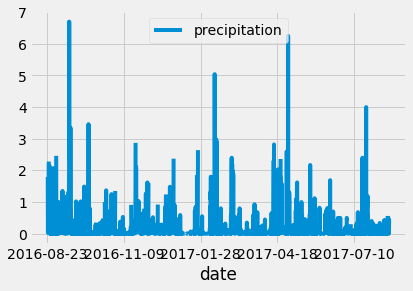

In [19]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#Starting from the last data point in the database. 

# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
results = []
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year)

#print(results.all())

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date', 'precipitation'])

df.set_index(df['date'], inplace=True)                                

# # Sort the dataframe by date
df = df.sort_index()

#print(df)#setting the index to 'date' will repeat the index twice so here there will be two dates
#print(df.to_string(index=False))#print wihtout an index

# # Use Pandas Plotting with Matplotlib to plot the data

df.plot()


In [20]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [21]:
# How many stations are available in this dataset?
session.query(func.count(Station.station)).all()


[(9)]

In [22]:
# What are the most active stations?
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [23]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.date >= '2017-06-01').\
filter(Measurement.date <= '2017-06-31').all()

[(71.0, 83.0, 77.21989528795811)]

     tobs
0    77.0
1    77.0
2    80.0
3    80.0
4    75.0
..    ...
347  77.0
348  77.0
349  76.0
350  76.0
351  79.0

[352 rows x 1 columns]


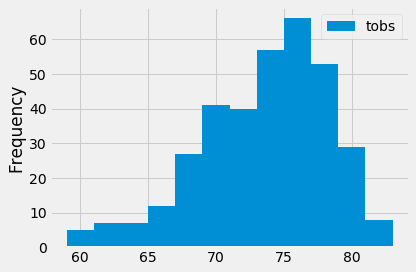

In [24]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= prev_year).all()

#convert results to a dataframe
df = pd.DataFrame(results, columns=['tobs'])

#print the dataframe
print(df)

#plot the Temperature Observations

df.plot.hist(bins=12)

plt.tight_layout()


In [25]:
import sqlite3
#establish a connection
conn = sqlite3.connect('/Users/otrin/OneDrive/Desktop/Git/surfs_up/hawaii.sqlite')
#create a cursor object to be able to run queries against a database
# cur = conn.cursor()
# cur.execute("SELECT * FROM measurement;")
# results = cur.fetchall()
# print(results)
df = pd.read_sql("SELECT * FROM measurement;", conn)
df.head()
df.tail()

,id,station,date,prcp,tobs
19545,19546,USC00516128,2017-08-19,0.09,71.0
19546,19547,USC00516128,2017-08-20,NaN,78.0
19547,19548,USC00516128,2017-08-21,0.56,76.0
19548,19549,USC00516128,2017-08-22,0.50,76.0
19549,19550,USC00516128,2017-08-23,0.45,76.0


In [33]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start, end):
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]           
    if not end:
        results = session.query(*sel).\
	        filter(Measurement.date <= start).all()
        temps = list(np.ravel(results))
        return temps
    results = session.query(*sel).\
        filter(Measurement.date >= start).\
	    filter(Measurement.date <= end).all()
    temps = list(np.ravel(results))
    return temps

In [32]:
calc_temps('2017-07-03', '2017-07-03')

[76.0, 79.57142857142857, 87.0]

In [17]:
#create a cursor object to be able to run queries against a database
# cur = conn.cursor()
# cur.execute("SELECT * FROM measurement;")
# results = cur.fetchall()
# print(results)

# Challenge

In [18]:
import datetime as dt
import pandas as pd
import sqlite3
#establish a connection
conn = sqlite3.connect('/Users/otrin/OneDrive/Desktop/Git/surfs_up/hawaii.sqlite')
df = pd.read_sql("SELECT * FROM measurement;", con)


NameError: name 'con' is not defined

In [ ]:
#confirm correct import of data
df.head()

In [ ]:
#confirm correct import of data
df.tail()

In [ ]:
#get statistics for the whole dataset
df.describe()

In [ ]:
#determine if the date column is in the correct format -> has to be datetime format
df.dtypes

In [ ]:
#convert date column to datetime format
df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True)

In [ ]:
#confirm that the date column is now in datetime format
df['date'].dtype

In [ ]:
#select only observations in June across all stations and years
june_df = df.loc[df['date'].dt.month == 6]
#confirm if data is correct
june_df

In [ ]:
#obtain descriptive statistics
june_df.describe()

In [ ]:
#select only observations in June across all stations and years
december_df = df.loc[df['date'].dt.month == 12]
#confirm if correct data is obtained
december_df

In [ ]:
#obtain descriptive statistics for december
december_df.describe()

## Written Analysis

Simply stated, Hawaii is awesome. The temperature is comfortable throughout the year and although it rains there is still a lot of sun to go around. Surf and shake is something that definitely could thrive! The tables below describe the temperature and precipitation data for June and December.

__June Descriptive Statistics__
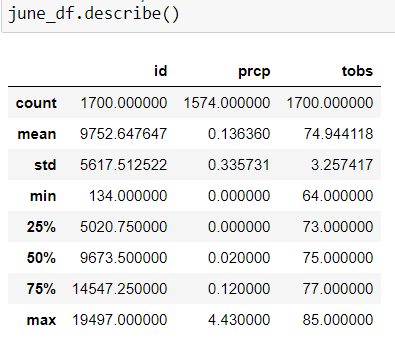

__December Descriptive Statistics__

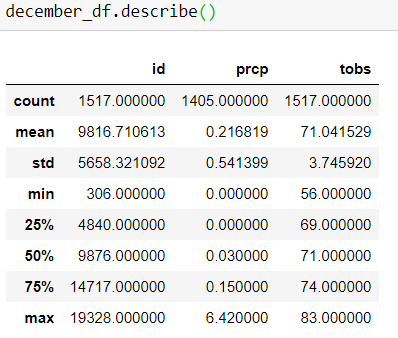

### Temperature Comparison June and December

Based on the temperature observations available from 2010 to 2017, there appears to be very little variation in the temperature in Oahu in the months of June and December. In fact the difference in mean temperature between the two months is only about 3 degrees, a comfortable 74 degrees in June and 71 in December, perfect for the shake and surf business. The median temperature, 71 degrees, is virtually the same as the mean meaning that there really is very little variation! 

The maximum temperature is around 83 (December) and 85 (June) and the minimum 56 (December) and 64 (June). The standard deviation in the temperature observations are 3.75 degrees (December) and 3.25 degrees (June). This relatively low variation in temperature means people are going to be out more days in the year and hopefully patronizing the shake and surf shop.

### Precipitation Comparison June and December

Based on the preciptiation observations available from 2010 to 2017, presents the same story as the temperature observations--Hawaii is a very climatically stable place. There appears to be very little variation in the amount of precipitation in Oahu in the months of June and December. The mean amount of precipitation  is .14 inches in June and 0.22 inches in December slighlty more rainy in December but not by much. The median precipitation is .03 inches in December and .02 in June.  

The maximum precipitation is 6.42" (December) and 4.43" (June) and the minimum 0 (December) and 0 (June). The standard deviation in the temperature observations are 0.54" (December) and 0.33" (June). This relatively low variation in precipitations appears to indicate that there are a lot of rainy days. However the good news is the rain is minimal.


### Recommendations
The following information may also be useful to look at in making the final decision for starting the shop:

1. Find out how many rainy days there are yearly,
2. Find out how many days below 60 degrees,
3. Find out the hottest month of the year

